# Problem Statement-

Weather forecasting is the application of science and technology to predict the conditions of the atmosphere for a given location and time. Weather forecasts are made by collecting quantitative data about the current state of the atmosphere at a given place and using meteorology to project how the atmosphere will change.

Rain Dataset is to predict whether or not it will rain tomorrow. The Dataset contains about 10 years of daily weather observations of different locations in Australia. Here, predict two things:
 
a) Design a predictive model with the use of machine learning algorithms to forecast whether or not it will rain tomorrow.

b)  Design a predictive model with the use of machine learning algorithms to predict how much rainfall could be there.

In [47]:
#Let's start with importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import warnings
warnings.filterwarnings("ignore")

In [48]:
#Read csv file and convert into Dataframe
data=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset3/main/weatherAUS.csv")
data

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
8421,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
8422,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
8423,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


# Observation-

The features in the above data set are-

- Date  - The date of observation

- Location  -The common name of the location of the weather station

- MinTemp  -The minimum temperature in degrees celsius

- MaxTemp -The maximum temperature in degrees celsius

- Evaporation  -The so-called Class A pan evaporation (mm) in the 24 hours to 9am

- Sunshine  -The number of hours of bright sunshine in the day.

- WindGustDir- The direction of the strongest wind gust in the 24 hours to midnight

- WindGustSpeed -The speed (km/h) of the strongest wind gust in the 24 hours to midnight

- WindDir9am -Direction of the wind at 9am

- WindDir3pm -Direction of the wind at 3pm

- WindSpeed9am -Wind speed (km/hr) averaged over 10 minutes prior to 9am

- WindSpeed3pm -Wind speed (km/hr) averaged over 10 minutes prior to 3pm

- Humidity9am -Humidity (percent) at 9am

- Humidity3pm -Humidity (percent) at 3pm

- Pressure9am -Atmospheric pressure (hpa) reduced to mean sea level at 9am

- Pressure3pm -Atmospheric pressure (hpa) reduced to mean sea level at 3pm

- Cloud9am - Fraction of sky obscured by cloud at 9am. 

- Cloud3pm -Fraction of sky obscured by cloud 

- Temp9am-Temperature (degrees C) at 9am

- Temp3pm -Temperature (degrees C) at 3pm

- RainToday - Boolean: 1 if precipitation (mm) in the 24 hours to 9am exceeds 1mm, otherwise 0
 
The label in the given dataset is-

-Classification-
- RainTomorrow - The amount of next day rain in mm. Used to create response variable . A kind of measure of the "risk".

-Regression-
- Rainfall  -The amount of rainfall recorded for the day in mm

In [49]:
#shape of file
data.shape

(8425, 23)

In [50]:
# Checking for data types of the columns
data.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

# 
As there are object datatypes, we will apply encoding techniques

In [51]:
# Checking for null values
data.isnull().sum()

Date                0
Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
dtype: int64

# 
The null values will be dealt post encoding

# Visualization of the Data and Encoding object data

In [52]:
data['Date']=pd.to_datetime(data['Date'])

In [53]:
#Storing date and month in separate column
#As the year is 2019, it need not be stored
data['Day']=data['Date'].dt.day
data['Month']=data['Date'].dt.month
data['Year']=data['Date'].dt.year

In [54]:
data

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Day,Month,Year
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,1007.1,8.0,NaN,16.9,21.8,No,No,1,12,2008
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,1007.8,NaN,NaN,17.2,24.3,No,No,2,12,2008
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,1008.7,NaN,2.0,21.0,23.2,No,No,3,12,2008
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,1012.8,NaN,NaN,18.1,26.5,No,No,4,12,2008
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,1006.0,7.0,8.0,17.8,29.7,No,No,5,12,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,1020.3,NaN,NaN,10.1,22.4,No,No,21,6,2017
8421,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,1019.1,NaN,NaN,10.9,24.5,No,No,22,6,2017
8422,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,1016.8,NaN,NaN,12.5,26.1,No,No,23,6,2017
8423,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,1016.5,3.0,2.0,15.1,26.0,No,No,24,6,2017


In [55]:
#As the date is stored in day, month and year columns, date is deleted
data=data.drop(columns=["Date"])

<AxesSubplot:ylabel='Frequency'>

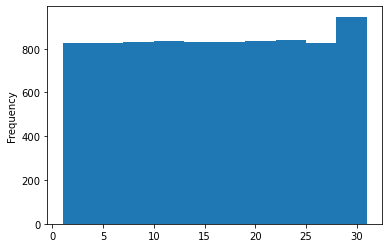

In [56]:
data.Day.plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

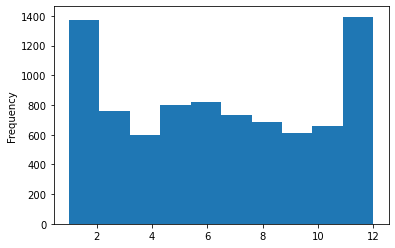

In [57]:
data.Month.plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

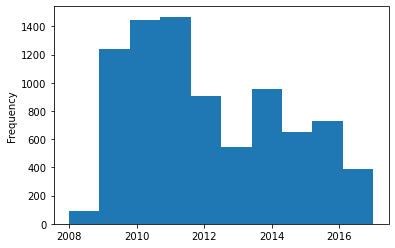

In [58]:
data.Year.plot(kind='hist')

Melbourne       1622
Williamtown     1230
PerthAirport    1204
Albury           907
Newcastle        822
CoffsHarbour     611
Brisbane         579
Penrith          482
Wollongong       474
Darwin           250
Adelaide         205
Uluru             39
Name: Location, dtype: int64


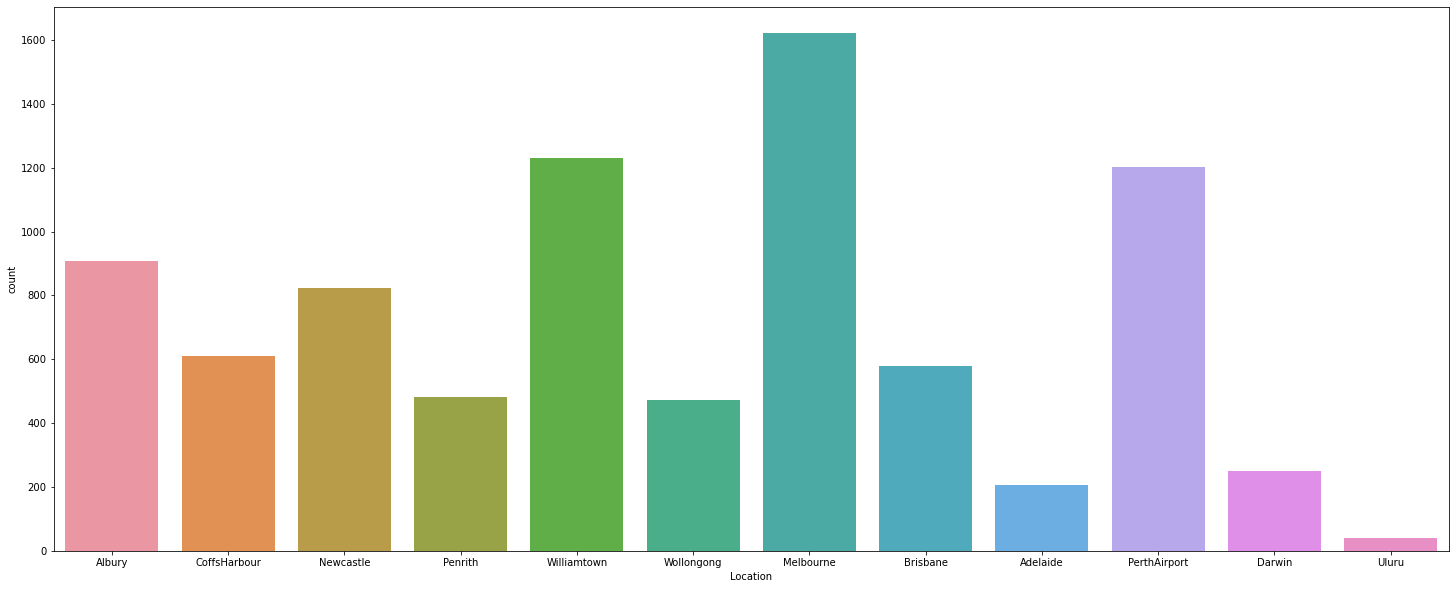

In [59]:
plt.figure(figsize=(25,10))
ax=sns.countplot(x="Location", data=data)
print(data["Location"].value_counts())

# 
1622 weather forecast of Melbourne, 1230 weather forecast of Williamtown, 1204 weather forecast of PerthAirport, 907 weather forecast of Albury, 822 weather forecast of Newcastle, 611 weather forecast of CoffsHarbour, 579 weather forecast of Brisbane, 482 weather forecast of Penrith, 474 weather forecast of Wollongong, 250 weather forecast of Darwin, 205 weather forecast of Adelaide, 39 weather forecast of Uluru

In [60]:
#Encoding string into numeric data by alphabetical order

from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()
df=enc.fit_transform(data["Location"])
data["Location"]=df

# 
The data is encoded as follows-

- 0 - Adelaide
- 1 - Albury
- 2 - Brisbane
- 3 - CoffsHarbour
- 4 - Darwin 
- 5 - Melbourne
- 6 - Newcastle
- 7 - Penrith
- 8 - PerthAirport
- 9 - Uluru
- 10- Williamtown 
- 11- Wollongong

N      713
SSE    578
S      577
SW     572
E      557
WNW    531
W      507
WSW    504
SE     484
ENE    415
SSW    396
NW     383
NE     353
NNE    343
ESE    302
NNW    219
Name: WindGustDir, dtype: int64


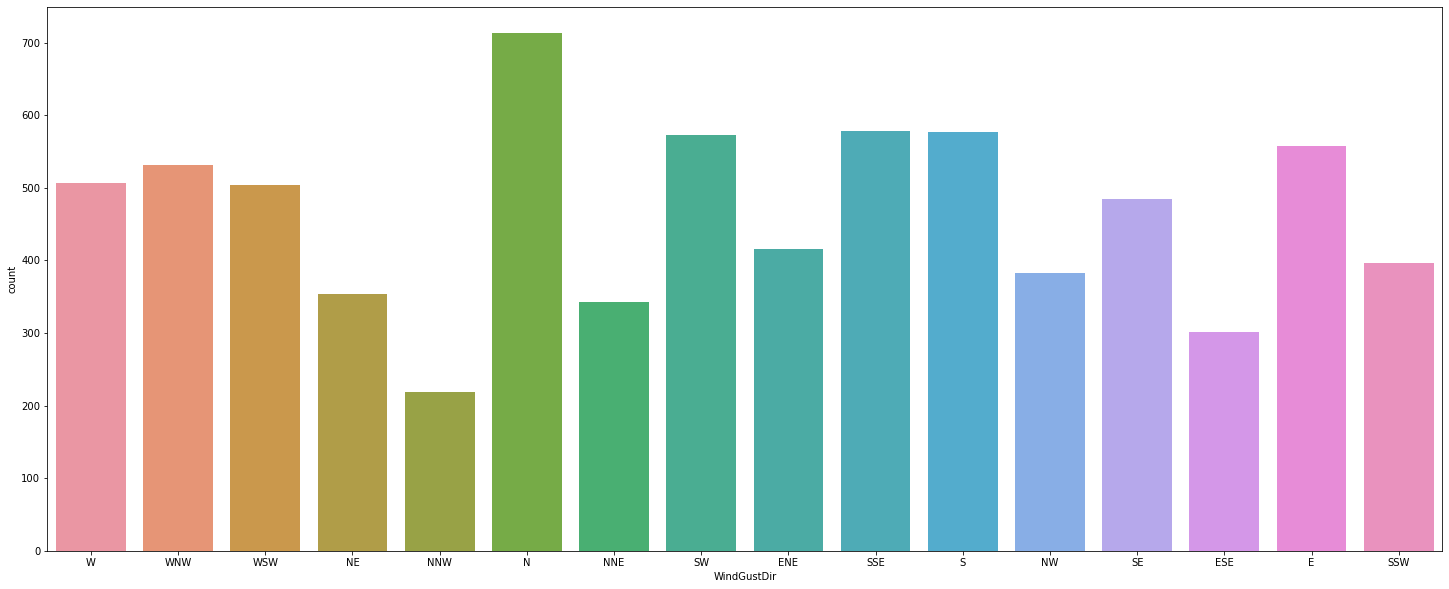

In [61]:
plt.figure(figsize=(25,10))
ax=sns.countplot(x="WindGustDir", data=data)
print(data["WindGustDir"].value_counts())

# 
713 weather forecast have win direction of N, 578 weather forecast have win direction of SSE, 577 weather forecast have win direction of S, 572 weather forecast have win direction of SW, 557 weather forecast have win direction of E , 531 weather forecast have win direction of WNW, 507 weather forecast have win direction of W, 504 weather forecast have win direction of WSW, 484 weather forecast have win direction of SE, 415 weather forecast have win direction of ENE, 396 weather forecast have win direction of SSW, 383 weather forecast have win direction of NW, 353 weather forecast have win direction of NE, 343 weather forecast have win direction of NNE, 302 weather forecast have win direction of ESE, 219 weather forecast have win direction of NNW 

In [62]:
#Encoding string into numeric data by alphabetical order

from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()
df=enc.fit_transform(data["WindGustDir"])
data["WindGustDir"]=df


The data is encoded as follows-

- 0 - E
- 1 - ENE
- 2 - ESE
- 3 - N
- 4 - NE 
- 5 - NNE
- 6 - NNW
- 7 - NW
- 8 - S
- 9 - SE
- 10- SSE 
- 11- SSW
- 12- SW
- 14- WNW
- 15- WSW
- 16- Null

In [63]:
#Filling Null with the mode of the column
data["WindGustDir"]=data["WindGustDir"].replace(16,data['WindGustDir'].mode()[0])

N      906
SW     704
NW     625
WSW    543
SE     505
WNW    480
SSW    467
ENE    433
NNE    430
W      414
NE     409
S      402
E      380
SSE    365
NNW    280
ESE    253
Name: WindDir9am, dtype: int64


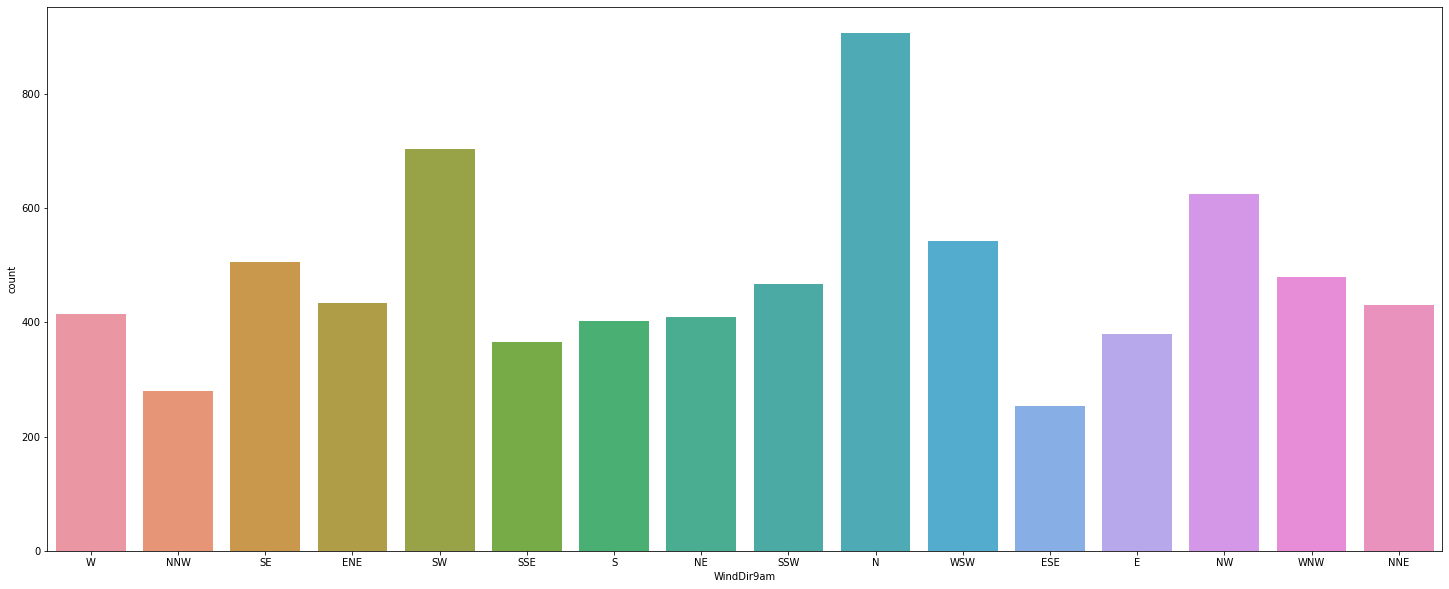

In [64]:
plt.figure(figsize=(25,10))
ax=sns.countplot(x="WindDir9am", data=data)
print(data["WindDir9am"].value_counts())

# 
906 weather forecast at 9am have wind direction to N, 704 weather forecast at 9am have wind direction to SW, 625 weather forecast at 9am have wind direction to NW, 543 weather forecast at 9am have wind direction to WSW, 505 weather forecast at 9am have wind direction to SE, 480 weather forecast at 9am have wind direction to WNW, 467 weather forecast at 9am have wind direction to SSW, 433 weather forecast at 9am have wind direction to ENE, 430 weather forecast at 9am have wind direction to NNE, 414 weather forecast at 9am have wind direction to W, 409 weather forecast at 9am have wind direction to NE, 402 weather forecast at 9am have wind direction to S, 380 weather forecast at 9am have wind direction to E , 365 weather forecast at 9am have wind direction to SSE, 280 weather forecast at 9am have wind direction to NNW, 253 weather forecast at 9am have wind direction to ESE

In [65]:
#Encoding string into numeric data by alphabetical order

from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()
df=enc.fit_transform(data["WindDir9am"])
data["WindDir9am"]=df

# 
The data is encoded as follows-

- 0 - E
- 1 - ENE
- 2 - ESE
- 3 - N
- 4 - NE 
- 5 - NNE
- 6 - NNW
- 7 - NW
- 8 - S
- 9 - SE
- 10- SSE 
- 11- SSW
- 12- SW
- 14- WNW
- 15- WSW
- 16- Null

In [66]:
#Filling Null with the mode of the column
data["WindDir9am"]=data["WindDir9am"].replace(16,data['WindDir9am'].mode()[0])

SE     813
S      742
SSE    623
WSW    580
NE     544
N      524
SW     494
WNW    487
NW     468
W      462
ESE    462
E      460
ENE    417
SSW    370
NNE    365
NNW    306
Name: WindDir3pm, dtype: int64


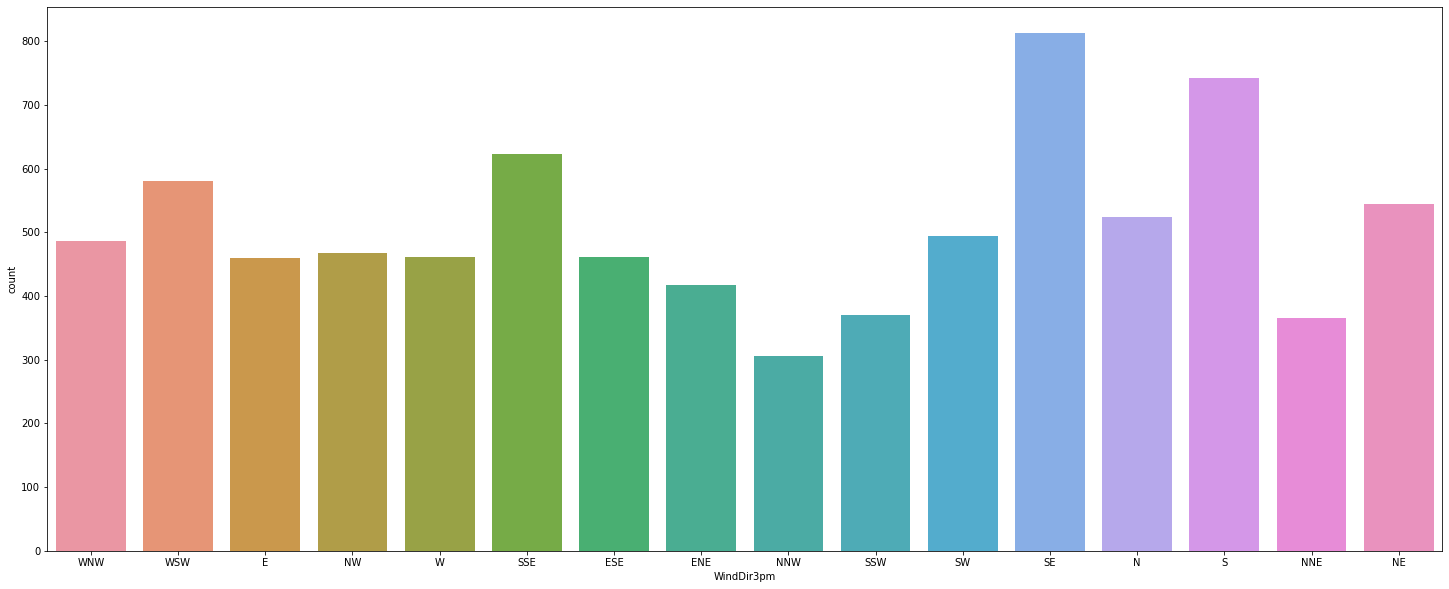

In [67]:
plt.figure(figsize=(25,10))
ax=sns.countplot(x="WindDir3pm", data=data)
print(data["WindDir3pm"].value_counts())

# 
813 weather forecast at 3pm have wind direction to SE, 742 weather forecast at 3pm have wind direction to S, 623 weather forecast at 3pm have wind direction to SSE, 580 weather forecast at 3pm have wind direction to WSW, 544 weather forecast at 3pm have wind direction to NE, 524 weather forecast at 3pm have wind direction to N, 494 weather forecast at 3pm have wind direction to SW, 487 weather forecast at 3pm have wind direction to WNW, 468 weather forecast at 3pm have wind direction to NW, 462 weather forecast at 3pm have wind direction to W, 462 weather forecast at 3pm have wind direction to ESE, 460 weather forecast at 3pm have wind direction to E, 417 weather forecast at 3pm have wind direction to ENE, 370 weather forecast at 3pm have wind direction to SSW, 365 weather forecast at 3pm have wind direction to NNE, 306 weather forecast at 3pm have wind direction to NNW

In [68]:
#Encoding string into numeric data by alphabetical order

from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()
df=enc.fit_transform(data["WindDir3pm"])
data["WindDir3pm"]=df

# 
The data is encoded as follows-

- 0 - E
- 1 - ENE
- 2 - ESE
- 3 - N
- 4 - NE 
- 5 - NNE
- 6 - NNW
- 7 - NW
- 8 - S
- 9 - SE
- 10- SSE 
- 11- SSW
- 12- SW
- 14- WNW
- 15- WSW
- 16- Null

In [69]:
#Filling Null with the mode of the column
data["WindDir3pm"]=data["WindDir3pm"].replace(16,data['WindDir3pm'].mode()[0])

No     6195
Yes    1990
Name: RainToday, dtype: int64


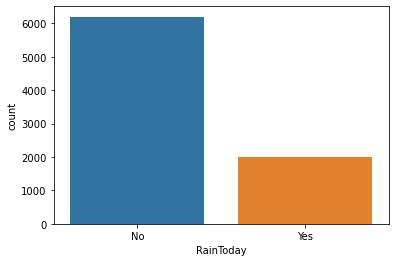

In [70]:
ax=sns.countplot(x="RainToday", data=data)
print(data["RainToday"].value_counts())

# 
6195 predicts it will not rain, 1990 predicts it will rain

In [71]:
#Encoding string into numeric data by alphabetical order

from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()
df=enc.fit_transform(data["RainToday"])
data["RainToday"]=df

# 
The data is encoded as follows-

- 0 - No
- 1 - Yes
- 2 - Null

In [73]:
#Filling Null with the mode of the column
data["RainToday"]=data["RainToday"].replace(2,data['RainToday'].mode()[0])

No     6195
Yes    1991
Name: RainTomorrow, dtype: int64


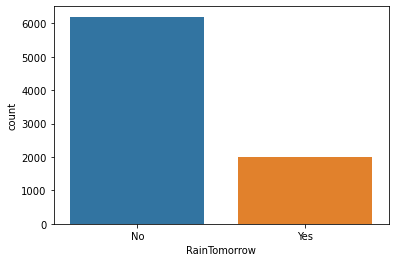

In [74]:
ax=sns.countplot(x="RainTomorrow", data=data)
print(data["RainTomorrow"].value_counts())

# 
6195 predicts no rain tomorrow, 1991 predicts rain tomorrow

In [75]:
#Encoding string into numeric data by alphabetical order

from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()
df=enc.fit_transform(data["RainTomorrow"])
data["RainTomorrow"]=df

# 
The data is encoded as follows-

- 0 - No
- 1 - Yes
- 2 - Null

In [77]:
#Filling Null with the mode of the column
data["RainTomorrow"]=data["RainTomorrow"].replace(2,data['RainTomorrow'].mode()[0])

In [78]:
data.isnull().sum()

Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir         0
WindGustSpeed     991
WindDir9am          0
WindDir3pm          0
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday           0
RainTomorrow        0
Day                 0
Month               0
Year                0
dtype: int64

# Imputing null values

In [79]:
data.columns

Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow', 'Day', 'Month', 'Year'],
      dtype='object')

In [80]:
from sklearn.impute import KNNImputer
knnimp=KNNImputer(n_neighbors=3)
df=pd.DataFrame(knnimp.fit_transform(data[['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine','WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm','WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm','Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am','Temp3pm', 'RainToday', 'RainTomorrow', 'Day', 'Month', 'Year']]), columns=['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine','WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm','WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm','Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am','Temp3pm', 'RainToday', 'RainTomorrow', 'Day', 'Month', 'Year'])
data['MinTemp']=df['MinTemp']
data['MaxTemp']=df['MaxTemp']
data['Rainfall']=df['Rainfall']
data['Evaporation']=df['Evaporation']
data['Sunshine']=df['Sunshine']
data['WindGustSpeed']=df['WindGustSpeed']
data['WindSpeed9am']=df['WindSpeed9am']
data['WindSpeed3pm']=df['WindSpeed3pm']
data['Humidity9am']=df['Humidity9am']
data['Humidity3pm']=df['Humidity3pm']
data['Pressure9am']=df['Pressure9am']
data['Pressure3pm']=df['Pressure3pm']
data['Cloud9am']=df['Cloud9am']
data['Cloud3pm']=df['Cloud3pm']
data['Temp9am']=df['Temp9am']
data['Temp3pm']=df['Temp3pm']

In [81]:
data.isnull().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
Day              0
Month            0
Year             0
dtype: int64

# 
The null values have been imputed

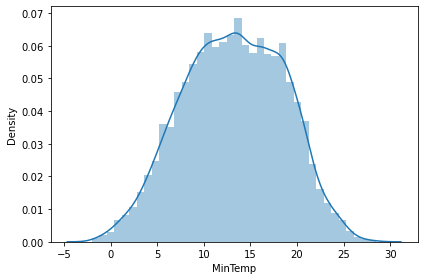

In [82]:
sns.distplot(data["MinTemp"])
plt.xlabel("MinTemp",fontsize=10)
plt.tight_layout()

# 
The data looks fairly normally distributed

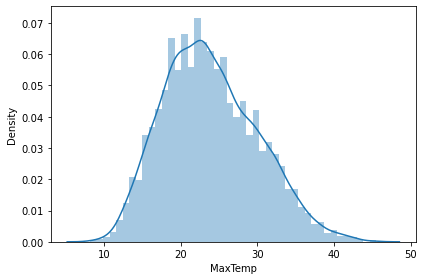

In [83]:
sns.distplot(data["MaxTemp"])
plt.xlabel("MaxTemp",fontsize=10)
plt.tight_layout()

# 
The data looks fairly normally distributed

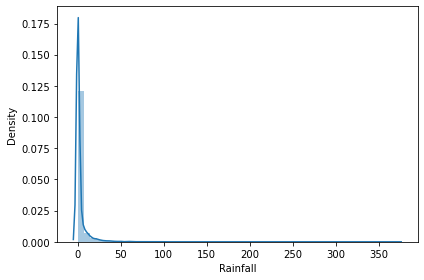

In [84]:
sns.distplot(data["Rainfall"])
plt.xlabel("Rainfall",fontsize=10)
plt.tight_layout()

# 
The data is skewed, and will be dealt later

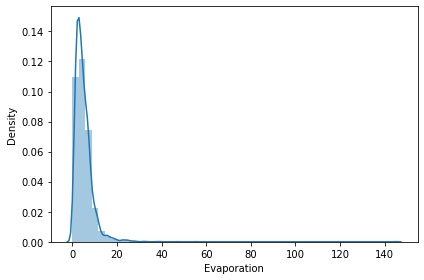

In [85]:
sns.distplot(data["Evaporation"])
plt.xlabel("Evaporation",fontsize=10)
plt.tight_layout()

# 
The data is skewed, and will be dealt later

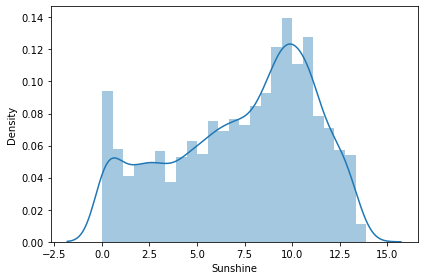

In [86]:
sns.distplot(data["Sunshine"])
plt.xlabel("Sunshine",fontsize=10)
plt.tight_layout()

# 
The data is skewed, and will be dealt later

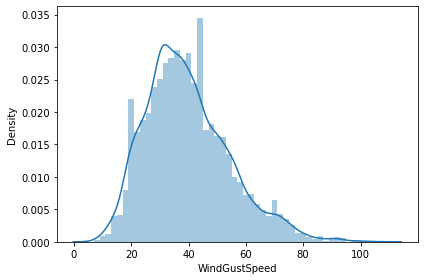

In [87]:
sns.distplot(data["WindGustSpeed"])
plt.xlabel("WindGustSpeed",fontsize=10)
plt.tight_layout()

# 
The data is slightly skewed and will be dealt later

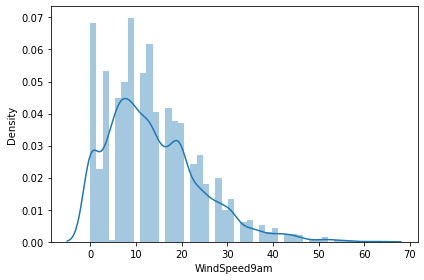

In [88]:
sns.distplot(data["WindSpeed9am"])
plt.xlabel("WindSpeed9am",fontsize=10)
plt.tight_layout()

# 
The data is skewed and will be dealt later

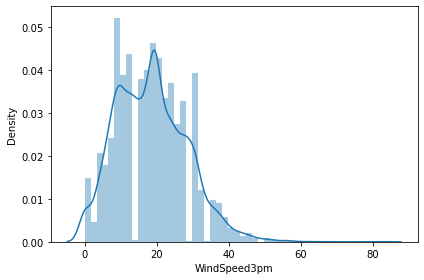

In [90]:
sns.distplot(data["WindSpeed3pm"])
plt.xlabel("WindSpeed3pm",fontsize=10)
plt.tight_layout()

# 
The data is skewed and will be dealt later

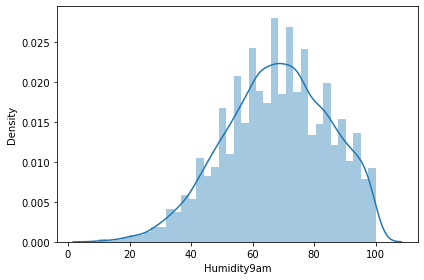

In [91]:
sns.distplot(data["Humidity9am"])
plt.xlabel("Humidity9am",fontsize=10)
plt.tight_layout()

# 
The data is skewed and will be dealt later

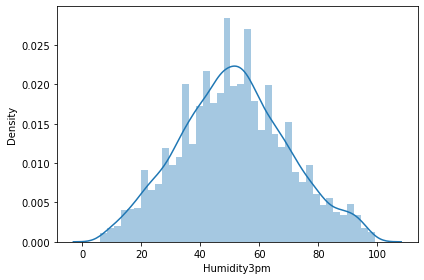

In [92]:
sns.distplot(data["Humidity3pm"])
plt.xlabel("Humidity3pm",fontsize=10)
plt.tight_layout()

# 
The data looks fairly normally distributed

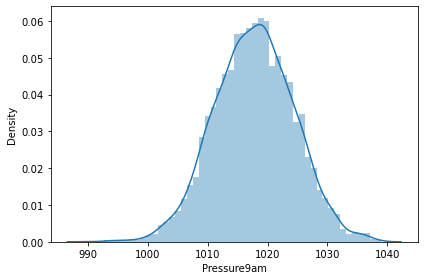

In [93]:
sns.distplot(data["Pressure9am"])
plt.xlabel("Pressure9am",fontsize=10)
plt.tight_layout()

# 
The data is slightly skewed and will be dealt later

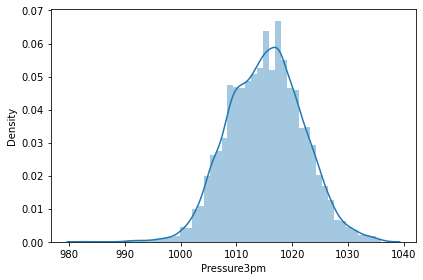

In [94]:
sns.distplot(data["Pressure3pm"])
plt.xlabel("Pressure3pm",fontsize=10)
plt.tight_layout()

# 
The data is slightly skewed and will be dealt later

<AxesSubplot:ylabel='Frequency'>

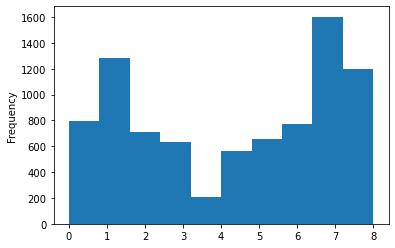

In [96]:
data.Cloud9am.plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

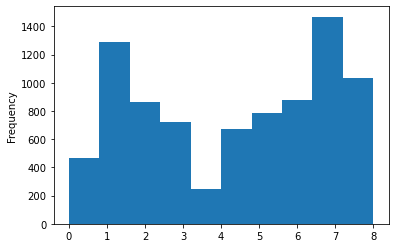

In [97]:
data.Cloud3pm.plot(kind='hist')

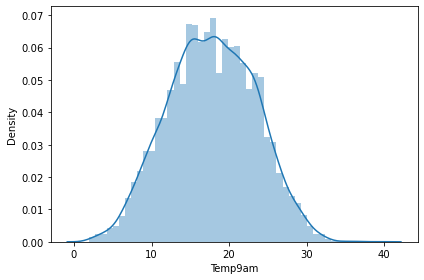

In [98]:
sns.distplot(data["Temp9am"])
plt.xlabel("Temp9am",fontsize=10)
plt.tight_layout()

# 
The data looks fairly normally distributed

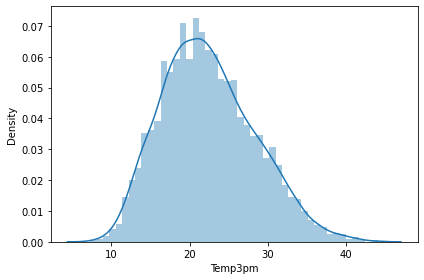

In [99]:
sns.distplot(data["Temp3pm"])
plt.xlabel("Temp3pm",fontsize=10)
plt.tight_layout()

# 
The data looks fairly normally distributed

In [100]:
#Statistical Analysis
data.describe()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Day,Month,Year
count,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,...,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000
mean,5.793591,13.196016,23.861416,2.790675,5.075648,7.354904,8.746944,39.486884,7.267418,7.810445,...,1015.260502,4.329258,4.341919,17.764993,22.427794,0.236202,0.236320,15.741958,6.442136,2012.102433
std,3.162654,5.396063,6.122241,10.332809,4.546066,3.711053,5.172665,14.591324,4.588045,4.430162,...,6.616798,2.731117,2.560581,5.618635,5.960894,0.424773,0.424846,8.787354,3.437994,2.473137
min,0.000000,-2.000000,8.200000,0.000000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,...,982.900000,0.000000,0.000000,1.900000,7.300000,0.000000,0.000000,1.000000,1.000000,2008.000000
25%,3.000000,9.200000,19.300000,0.000000,2.400000,4.600000,4.000000,30.000000,3.000000,4.000000,...,1010.500000,1.666667,2.000000,13.800000,18.000000,0.000000,0.000000,8.000000,3.000000,2010.000000
50%,6.000000,13.300000,23.300000,0.000000,4.200000,8.100000,9.000000,37.000000,7.000000,8.000000,...,1015.400000,5.000000,4.666667,17.800000,21.900000,0.000000,0.000000,16.000000,6.000000,2011.000000
75%,8.000000,17.400000,28.000000,1.000000,6.600000,10.300000,13.000000,48.000000,12.000000,11.000000,...,1019.800000,7.000000,7.000000,21.900000,26.400000,0.000000,0.000000,23.000000,9.000000,2014.000000
max,11.000000,28.500000,45.500000,371.000000,145.000000,13.900000,16.000000,107.000000,15.000000,15.000000,...,1036.000000,8.000000,8.000000,39.400000,44.100000,1.000000,1.000000,31.000000,12.000000,2017.000000


# Checking Correlation

In [101]:
data.corr()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Day,Month,Year
Location,1.000000,0.116694,0.063624,0.007270,0.181696,-0.004629,0.005877,0.223692,-0.027103,-0.027736,...,-0.014959,0.055416,0.047419,0.118123,0.060101,0.003071,0.002824,-0.002019,-0.082407,0.486405
MinTemp,0.116694,1.000000,0.719471,0.088645,0.380936,0.078533,-0.137957,0.240641,-0.042091,-0.147198,...,-0.461931,0.132619,0.068653,0.888126,0.688908,0.064361,0.092650,0.008510,-0.247290,0.043993
MaxTemp,0.063624,0.719471,1.000000,-0.090087,0.455039,0.513844,-0.201285,0.155221,-0.213994,-0.181047,...,-0.438190,-0.274299,-0.287041,0.867841,0.977252,-0.225626,-0.153302,0.014494,-0.165504,0.119623
Rainfall,0.007270,0.088645,-0.090087,1.000000,0.013702,-0.225968,0.056533,0.076764,0.095769,0.041080,...,-0.039975,0.205516,0.170766,-0.008712,-0.093179,0.460877,0.220140,-0.013383,-0.012871,0.005680
Evaporation,0.181696,0.380936,0.455039,0.013702,1.000000,0.288864,-0.081980,0.233100,-0.023323,-0.076937,...,-0.250550,-0.098459,-0.139015,0.444422,0.445925,-0.112479,-0.076412,0.010655,0.004801,0.165930
Sunshine,-0.004629,0.078533,0.513844,-0.225968,0.288864,1.000000,-0.104229,0.042281,-0.053845,-0.069705,...,-0.073127,-0.634177,-0.650215,0.321689,0.539310,-0.344581,-0.417697,0.008268,0.038556,0.064037
WindGustDir,0.005877,-0.137957,-0.201285,0.056533,-0.081980,-0.104229,1.000000,-0.051842,0.264084,0.475517,...,-0.053855,0.047851,0.065067,-0.161017,-0.215027,0.110949,0.040666,0.001823,0.057764,0.132782
WindGustSpeed,0.223692,0.240641,0.155221,0.076764,0.233100,0.042281,-0.051842,1.000000,-0.035660,0.060758,...,-0.387944,0.032181,0.088101,0.218723,0.117253,0.066526,0.177290,-0.014424,0.056232,-0.074068
WindDir9am,-0.027103,-0.042091,-0.213994,0.095769,-0.023323,-0.053845,0.264084,-0.035660,1.000000,0.249527,...,0.073515,0.095600,0.076181,-0.103388,-0.220941,0.157324,0.032860,-0.015154,0.012544,-0.014498
WindDir3pm,-0.027736,-0.147198,-0.181047,0.041080,-0.076937,-0.069705,0.475517,0.060758,0.249527,1.000000,...,-0.039781,0.065403,0.051741,-0.165117,-0.194942,0.100125,0.008918,0.003089,0.029384,-0.005812


# 
For better understanding let's use a heat map

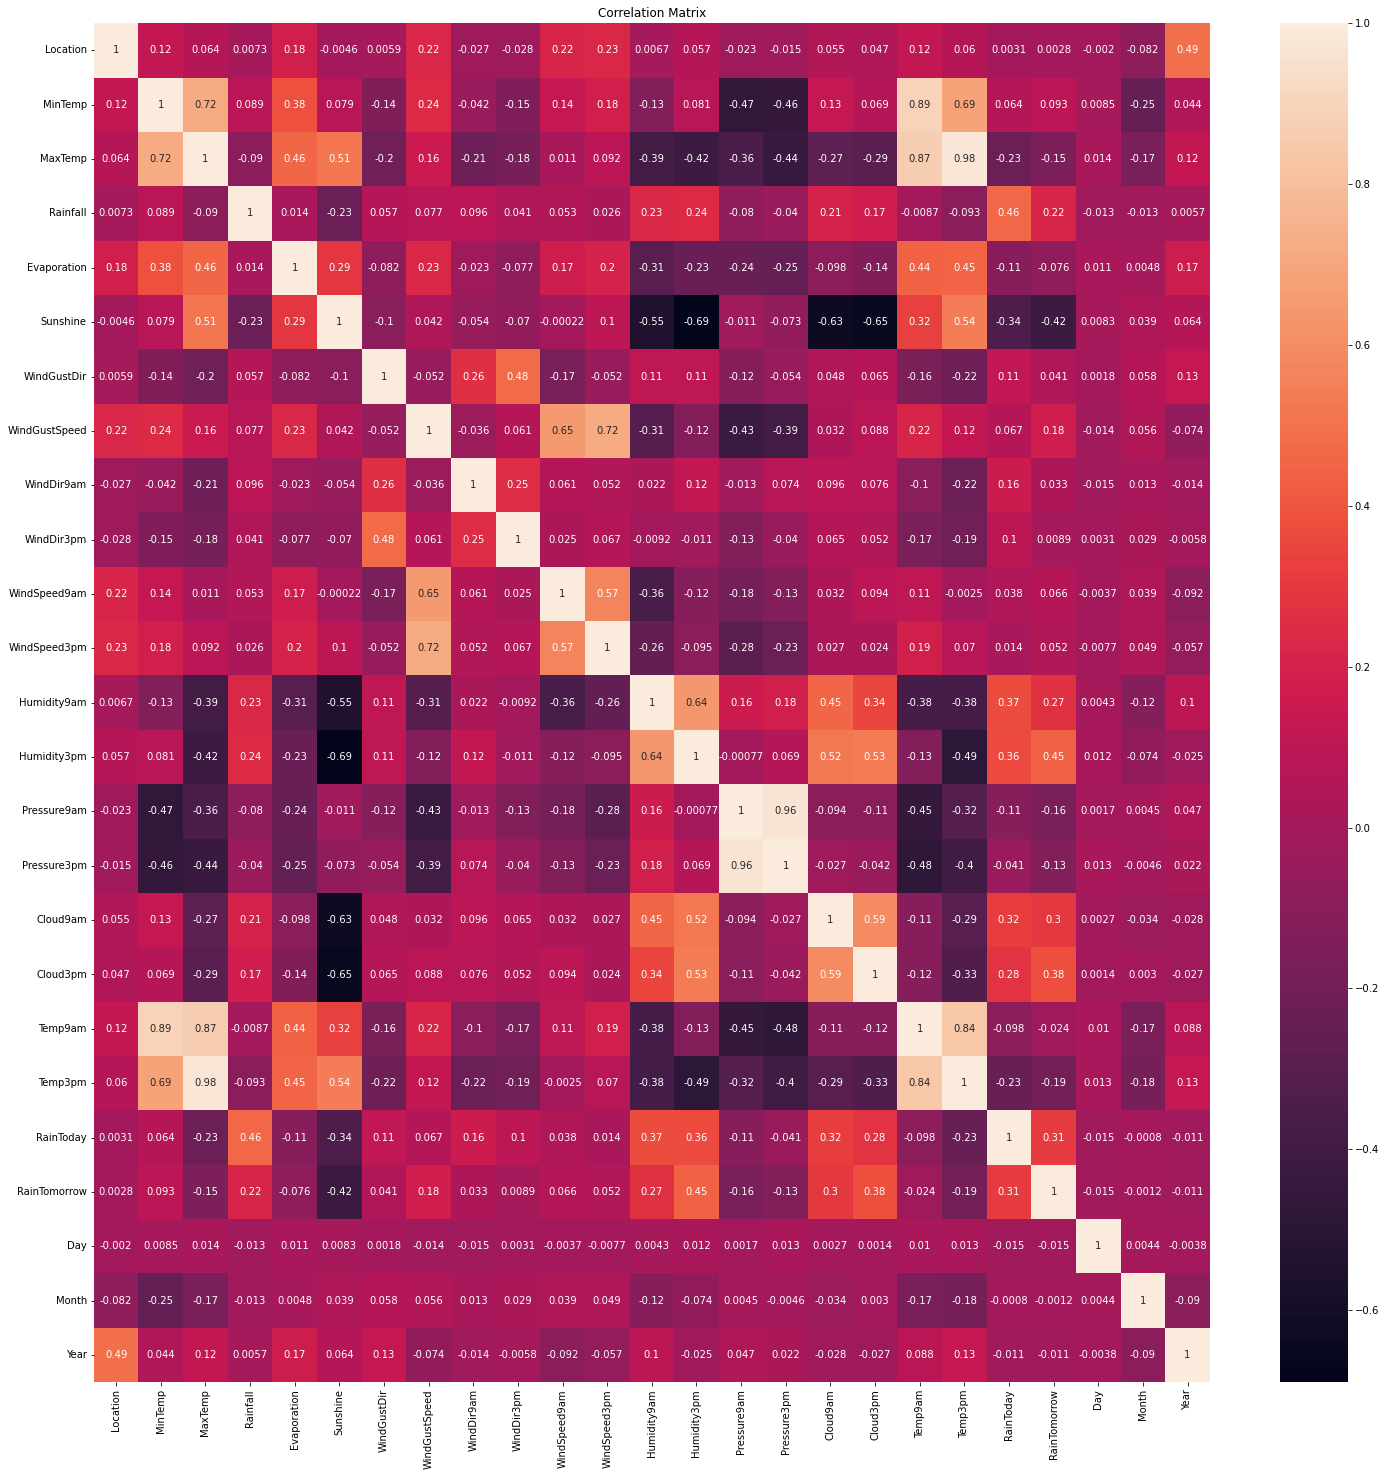

In [103]:
corr_mat=data.corr()

#size of the canvas
plt.figure(figsize=[25,25])

#plot the correlation matrix
sns.heatmap(corr_mat,annot=True, annot_kws={'size':10})
plt.title("Correlation Matrix")
plt.show()

# Observation-

# 
Let's print the correlation values of independent values with target variable for a better understanding

In [104]:
#Let's print the correlation coefficient for the Classification Prediction with RainTomorrow

corr_matrix=data.corr()
corr_matrix["RainTomorrow"].sort_values(ascending=True)

Sunshine        -0.417697
Temp3pm         -0.194105
Pressure9am     -0.163697
MaxTemp         -0.153302
Pressure3pm     -0.134606
Evaporation     -0.076412
Temp9am         -0.023683
Day             -0.015461
Year            -0.011066
Month           -0.001243
Location         0.002824
WindDir3pm       0.008918
WindDir9am       0.032860
WindGustDir      0.040666
WindSpeed3pm     0.051766
WindSpeed9am     0.065872
MinTemp          0.092650
WindGustSpeed    0.177290
Rainfall         0.220140
Humidity9am      0.271749
Cloud9am         0.299842
RainToday        0.312929
Cloud3pm         0.375841
Humidity3pm      0.445094
RainTomorrow     1.000000
Name: RainTomorrow, dtype: float64

# Observation-
- Sunshine, Temp3pm, Pressure9am, Evaporation, MaxTemp, Pressure3pm, Temp9am, Day, Year  and Month are negatively correlated to the label RainTomorrow
- Location, WindDir3pm, WindDir9am, WindGustDir, WindSpeed3pm, WindSpeed9am, MinTemp, WindGustSpeed, Rainfall, Humidity9am, Cloud9am, RainToday, Cloud3pm and Humidity3pm are positively correlated to the label RainTomorrow 
- Sunshine are 41% positively correlated to the label RainTomorrow showing a moderately strong bond
- Month is 0.1% negatively correlated with RainTomorrow showing a an extremely weak bond
- Location is 0.2% positively correlated with RainTomorrow showing an extremely weak bond
- Humidity3pm is 44% positively correlated with RainTomorrow showing an moderately strong bond

In [105]:
#Let's print the correlation coefficient for the Regression Prediction with Rainfall

corr_matrix=data.corr()
corr_matrix["Rainfall"].sort_values(ascending=True)

Sunshine        -0.225968
Temp3pm         -0.093179
MaxTemp         -0.090087
Pressure9am     -0.080173
Pressure3pm     -0.039975
Day             -0.013383
Month           -0.012871
Temp9am         -0.008712
Year             0.005680
Location         0.007270
Evaporation      0.013702
WindSpeed3pm     0.026086
WindDir3pm       0.041080
WindSpeed9am     0.052608
WindGustDir      0.056533
WindGustSpeed    0.076764
MinTemp          0.088645
WindDir9am       0.095769
Cloud3pm         0.170766
Cloud9am         0.205516
RainTomorrow     0.220140
Humidity9am      0.232423
Humidity3pm      0.238664
RainToday        0.460877
Rainfall         1.000000
Name: Rainfall, dtype: float64

# Observation-
- Sunshine, Temp3pm, MaxTemp, Pressure9am, Pressure3pm, Day, Month and Temp9am are negatively correlated to the label Rainfall
- Year, Location, Evaporation, WindSpeed3pm, WindDir3pm, WindSpeed9am, WindGustDir, WindGustSpeed, MinTemp, WindDir9am, Cloud3pm, Cloud9am, RainTomorrow, Humidity9am, Humidity3pm, and RainToday are positively correlated to the label Rainfall    
- Sunshine is 22% negatively correlated to the label Rainfall showing a moderately strong bond
- Temp9am is 0.8% negatively correlated with Rainfall showing an extremely weak bond
- Year is 0.5% positively correlated with Rainfall showing an extremely weak bond
- Year is 46% positively correlated with Rainfall showing an moderately strong bond

In [106]:
data.shape

(8425, 25)

# Checking for outliers

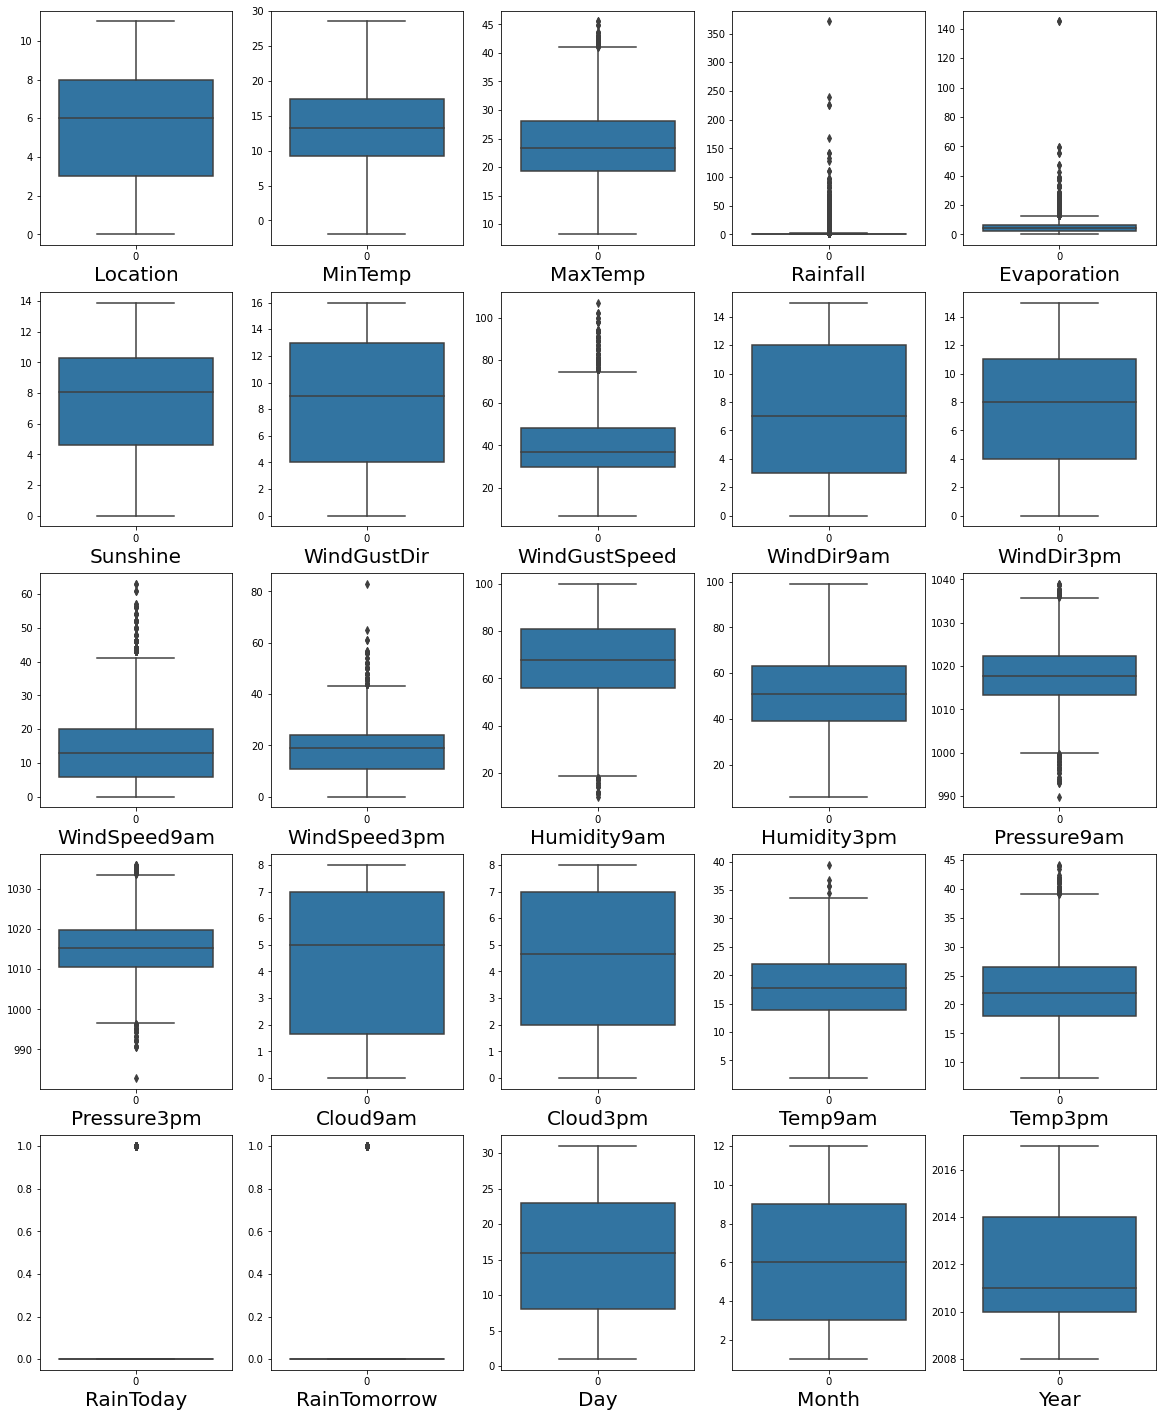

In [107]:
#visulaize the outliers using boxplot
plt.figure(figsize=(20,25))
graph=1

for column in data:
    if graph<=25:
        ax=plt.subplot(5,5,graph)
        sns.boxplot(data=data[column], orient='v')
        plt.xlabel(column,fontsize=20)
    graph=graph+1
plt.show()

# 
The features outliers-

- MaxTemp
- Rainfall
- Evaporation
- WindGustSpeed
- WindSpeed9am
- WindSpeed3pm
- Humidity9am
- Pressure9am
- Pressure3pm
- Temp9am
- Temp3pm
- Rain Today
- Rain Tomorrow

In [108]:
#remove outliers using zscore technique
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(data))
z.shape

(8425, 25)

In [109]:
threshold=3
print(np.where(z>3))

(array([  12,   12,   44,   44,   52,   52,   60,   60,   61,   61,   62,
         62,   67,   68,   68,  123,  267,  296,  350,  381,  381,  405,
        406,  407,  407,  431,  462,  563,  568,  683,  683,  699,  713,
        748,  760,  770,  796,  797,  802,  928,  935,  949,  979,  980,
        980,  980, 1008, 1009, 1011, 1138, 1148, 1149, 1151, 1189, 1202,
       1203, 1237, 1241, 1264, 1265, 1357, 1411, 1412, 1413, 1479, 1480,
       1481, 1513, 1535, 1587, 1612, 1644, 1654, 1661, 1665, 1671, 1673,
       1680, 1702, 1774, 1819, 1873, 1898, 1903, 1945, 2016, 2028, 2043,
       2063, 2074, 2108, 2116, 2162, 2186, 2201, 2219, 2219, 2219, 2230,
       2231, 2265, 2302, 2328, 2429, 2488, 2499, 2505, 2527, 2527, 2541,
       2593, 2607, 2676, 2677, 2735, 2835, 2849, 2849, 2855, 2859, 2860,
       2863, 2869, 2877, 2883, 2890, 2891, 2897, 2898, 2900, 2901, 2905,
       2909, 2911, 2919, 2933, 2939, 2946, 2947, 2953, 2959, 2961, 2966,
       2967, 2975, 2989, 3003, 3051, 3059, 3059, 3

In [110]:
data_new=data[(z<3).all(axis=1)]
print(data.shape)
print(data_new.shape)

(8425, 25)
(7996, 25)


# 
The data loss is 5.09%, and is tolerable

# Prediction 1- RainTomorrow (As the data is categorical, classification models are used)

# Divide Data Set into features and labels

In [112]:
y_c=data_new['RainTomorrow']
x_c=data_new.drop(columns=['RainTomorrow'])

In [113]:
#Confirming the skewness
x_c.skew().sort_values(ascending=False)

Rainfall         3.437141
RainToday        1.301209
Evaporation      1.268011
WindSpeed9am     0.710921
WindGustSpeed    0.541520
Year             0.433918
Temp3pm          0.342685
MaxTemp          0.319462
WindSpeed3pm     0.301909
WindDir9am       0.162321
Humidity3pm      0.116033
Pressure3pm      0.063350
Month            0.051181
Pressure9am      0.037164
Day              0.001222
Temp9am         -0.035233
Location        -0.038734
MinTemp         -0.077408
Cloud3pm        -0.099924
WindDir3pm      -0.127820
Cloud9am        -0.136483
WindGustDir     -0.190523
Humidity9am     -0.235600
Sunshine        -0.443017
dtype: float64

# 
Keeping +/-1.30 as the range of skewness, the columns not falling in this range are-

Rainfall  
RainToday                      

# Transforming Data to remove skewness

In [114]:
from sklearn.preprocessing import power_transform
x_nc=power_transform(x_c)

In [115]:
#Checking if skewness was rectified
x_skew=pd.DataFrame(x_nc, columns=x_c.columns)
x_skew.skew().sort_values(ascending=False)

RainToday        1.301209
Rainfall         0.986988
Year             0.427980
Pressure3pm      0.001986
Pressure9am      0.000457
Evaporation     -0.004747
WindGustSpeed   -0.010685
Temp3pm         -0.013406
MaxTemp         -0.014574
Humidity3pm     -0.038571
Temp9am         -0.057142
Humidity9am     -0.066484
WindSpeed3pm    -0.081010
MinTemp         -0.105772
WindSpeed9am    -0.115896
Month           -0.150135
WindDir9am      -0.159358
Location        -0.183869
Day             -0.213721
Cloud3pm        -0.219276
WindDir3pm      -0.250233
Cloud9am        -0.255936
WindGustDir     -0.309975
Sunshine        -0.328120
dtype: float64

# 
Skewness has been removed, let's move forward

# Scaling the data

In [116]:
scaler=StandardScaler()
X_scaled=scaler.fit_transform(x_skew)

# Using Logistic Regression Model

In [117]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

In [118]:
maxAccu=0     #maximum accuracy
maxRS=0       #best random state

#Finding Best random state
for i in range(0,200):
    x_train, x_test, y_train, y_test= train_test_split(X_scaled, y_c, test_size=0.2, random_state=i)
    LR=LogisticRegression()
    LR.fit(x_train, y_train)                #fitting the data will train the model
    predrf=LR.predict(x_test)               #this is the predicted target variable
    acc=accuracy_score(y_test, predrf)      #accuracy score
    print('accuracy', acc, 'random_state', i)
    
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
        print('accuracy', maxAccu, 'random_state', i)

accuracy 0.8375 random_state 0
accuracy 0.8375 random_state 0
accuracy 0.8375 random_state 1
accuracy 0.818125 random_state 2
accuracy 0.829375 random_state 3
accuracy 0.843125 random_state 4
accuracy 0.843125 random_state 4
accuracy 0.83875 random_state 5
accuracy 0.826875 random_state 6
accuracy 0.835 random_state 7
accuracy 0.84625 random_state 8
accuracy 0.84625 random_state 8
accuracy 0.8325 random_state 9
accuracy 0.85 random_state 10
accuracy 0.85 random_state 10
accuracy 0.82875 random_state 11
accuracy 0.844375 random_state 12
accuracy 0.835 random_state 13
accuracy 0.838125 random_state 14
accuracy 0.83625 random_state 15
accuracy 0.825 random_state 16
accuracy 0.8375 random_state 17
accuracy 0.835 random_state 18
accuracy 0.85125 random_state 19
accuracy 0.85125 random_state 19
accuracy 0.835625 random_state 20
accuracy 0.840625 random_state 21
accuracy 0.82875 random_state 22
accuracy 0.84 random_state 23
accuracy 0.84125 random_state 24
accuracy 0.831875 random_state 25
ac

In [119]:
#creating train-test-sloit using best random state observed(i.e.19)
x_train, x_test, y_train, y_test= train_test_split(X_scaled, y_c, test_size=0.2, random_state=19)

In [120]:
LR=LogisticRegression()
LR.fit(x_train, y_train)                
predlr=LR.predict(x_test)               
print("Accuracy ",accuracy_score(y_test, predlr)*100)      #accuracy score
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

Accuracy  85.125
[[1180   68]
 [ 170  182]]
              precision    recall  f1-score   support

           0       0.87      0.95      0.91      1248
           1       0.73      0.52      0.60       352

    accuracy                           0.85      1600
   macro avg       0.80      0.73      0.76      1600
weighted avg       0.84      0.85      0.84      1600



# Using KNeighbors Classifier Model

In [121]:
from sklearn.neighbors import KNeighborsClassifier

kn=KNeighborsClassifier()
kn.fit(x_train, y_train)
predkn=kn.predict(x_test)
print("Accuracy ",accuracy_score(y_test, predkn)*100)      #accuracy score
print(confusion_matrix(y_test,predkn))
print(classification_report(y_test,predkn))

Accuracy  84.5
[[1169   79]
 [ 169  183]]
              precision    recall  f1-score   support

           0       0.87      0.94      0.90      1248
           1       0.70      0.52      0.60       352

    accuracy                           0.84      1600
   macro avg       0.79      0.73      0.75      1600
weighted avg       0.84      0.84      0.84      1600



# Using Decision Tree Classifier

In [122]:
from sklearn.tree import DecisionTreeClassifier

dt=DecisionTreeClassifier()
dt.fit(x_train, y_train)
preddt=dt.predict(x_test)
print("Accuracy ",accuracy_score(y_test, preddt)*100)      #accuracy score
print(confusion_matrix(y_test,preddt))
print(classification_report(y_test,preddt))

Accuracy  86.1875
[[1135  113]
 [ 108  244]]
              precision    recall  f1-score   support

           0       0.91      0.91      0.91      1248
           1       0.68      0.69      0.69       352

    accuracy                           0.86      1600
   macro avg       0.80      0.80      0.80      1600
weighted avg       0.86      0.86      0.86      1600



# Using Random Forest Classifier

In [123]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier()
rf.fit(x_train, y_train)
predrf=rf.predict(x_test)
print("Accuracy ",accuracy_score(y_test, predrf)*100)      #accuracy score
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

Accuracy  89.8125
[[1212   36]
 [ 127  225]]
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      1248
           1       0.86      0.64      0.73       352

    accuracy                           0.90      1600
   macro avg       0.88      0.81      0.84      1600
weighted avg       0.90      0.90      0.89      1600



# Using AdaBoost Classifier

In [124]:
from sklearn.ensemble import AdaBoostClassifier

ada=AdaBoostClassifier()
ada.fit(x_train, y_train)
predada=ada.predict(x_test)
print("Accuracy ",accuracy_score(y_test, predada)*100)      #accuracy score
print(confusion_matrix(y_test,predada))
print(classification_report(y_test,predada))

Accuracy  84.5625
[[1173   75]
 [ 172  180]]
              precision    recall  f1-score   support

           0       0.87      0.94      0.90      1248
           1       0.71      0.51      0.59       352

    accuracy                           0.85      1600
   macro avg       0.79      0.73      0.75      1600
weighted avg       0.84      0.85      0.84      1600



# Using Gradient Boosting Classifier

In [125]:
from sklearn.ensemble import GradientBoostingClassifier

gbdt= GradientBoostingClassifier()
gbdt.fit(x_train, y_train)
gbdt_pred=gbdt.predict(x_test)
print("Accuracy ",accuracy_score(y_test, gbdt_pred)*100)      #accuracy score
print(confusion_matrix(y_test,gbdt_pred))
print(classification_report(y_test,gbdt_pred))

Accuracy  86.25
[[1191   57]
 [ 163  189]]
              precision    recall  f1-score   support

           0       0.88      0.95      0.92      1248
           1       0.77      0.54      0.63       352

    accuracy                           0.86      1600
   macro avg       0.82      0.75      0.77      1600
weighted avg       0.86      0.86      0.85      1600



# Using SVC

In [126]:
from sklearn.svm import SVC

svc=SVC()
svc.fit(x_train, y_train)
ad_pred=svc.predict(x_test)
print("Accuracy ",accuracy_score(y_test, ad_pred)*100)      #accuracy score
print(confusion_matrix(y_test,ad_pred))
print(classification_report(y_test,ad_pred))

Accuracy  86.0625
[[1203   45]
 [ 178  174]]
              precision    recall  f1-score   support

           0       0.87      0.96      0.92      1248
           1       0.79      0.49      0.61       352

    accuracy                           0.86      1600
   macro avg       0.83      0.73      0.76      1600
weighted avg       0.85      0.86      0.85      1600



# Cross Validation

In [127]:
from sklearn.model_selection import cross_val_score

#validation accuracy
scr=cross_val_score(LR,x_c,y_c,cv=5)
print("Cross validation score of Logistic Regression: ", scr.mean())

Cross validation score of Logistic Regression:  0.8247833802376485


In [128]:
scr2=cross_val_score(kn,x_c,y_c,cv=5)
print("Cross validation score of KNeighbor Classifier: ", scr2.mean())

Cross validation score of KNeighbor Classifier:  0.8085275953721076


In [129]:
scr3=cross_val_score(dt,x_c,y_c,cv=5)
print("Cross validation score of Decision Tree Classifier: ", scr3.mean())

Cross validation score of Decision Tree Classifier:  0.7808995465916198


In [130]:
scr4=cross_val_score(rf,x_c,y_c,cv=5)
print("Cross validation score of Random Forest Classifier: ", scr4.mean())

Cross validation score of Random Forest Classifier:  0.8544280800500312


In [131]:
scr5=cross_val_score(ada,x_c,y_c,cv=5)
print("Cross validation score of Ada Boost Classifier: ", scr5.mean())

Cross validation score of Ada Boost Classifier:  0.7965181363352094


In [132]:
scr6=cross_val_score(gbdt,x_c,y_c,cv=5)
print("Cross validation score of Gradient Boost Classifier: ", scr6.mean())

Cross validation score of Gradient Boost Classifier:  0.8050225922451532


In [133]:
scr7=cross_val_score(svc,x_c,y_c,cv=5)
print("Cross validation score of SVC model: ", scr7.mean())

Cross validation score of SVC model:  0.7715107879924954



Random Forest Classifier is performing better, hence it is carried forward

# Hyper Parameter Tuning

In [134]:
RandomForestClassifier()

RandomForestClassifier()

In [135]:
from sklearn.model_selection import GridSearchCV

#Creating parameter list to pass in GridSearchCV
parameters={'max_features':['auto','sqrt','log2'], 'max_depth':[4,5,6,7,8], 'criterion':['gini', 'entropy']}

In [136]:
GCV=GridSearchCV(RandomForestClassifier(), parameters, cv=5, scoring="accuracy")
GCV.fit(x_train,y_train)       #fitting data in the model
GCV.best_params_               #printing the best parameters found in GridSearchCV

{'criterion': 'gini', 'max_depth': 8, 'max_features': 'log2'}

In [137]:
GCV.best_estimator_

RandomForestClassifier(max_depth=8, max_features='log2')

In [138]:
GCV_pred=GCV.best_estimator_.predict(x_test)        #Predicting with best parameters
accuracy_score(y_test,GCV_pred) 

0.85375

# ROC AUC Plot

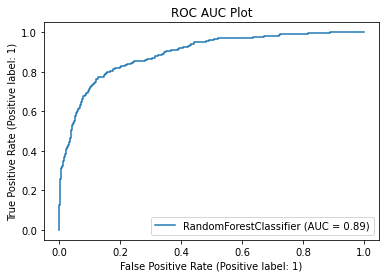

In [139]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(GCV.best_estimator_,x_test,y_test)
plt.title("ROC AUC Plot")
plt.show()

# 
Final Accuracy is 85.4% and AUC score is 89%, which depicts that our model is working well

# Saving the Random Forest Classifier Model for Prediction 1- RainTomorrow

In [141]:
filename='Rainfall Prediction 1- RainTomorrow.pkl'
pickle.dump(GCV, open(filename,'wb'))

# Prediction 2- Rainfall (As the data is continuous, regression models are used)

# Divide Data Set into features and labels

In [142]:
y_r=data_new['Rainfall']
x_r=data_new.drop(columns=['Rainfall'])

In [143]:
#Confirming the skewness
x_r.skew().sort_values(ascending=False)

RainToday        1.301209
RainTomorrow     1.293584
Evaporation      1.268011
WindSpeed9am     0.710921
WindGustSpeed    0.541520
Year             0.433918
Temp3pm          0.342685
MaxTemp          0.319462
WindSpeed3pm     0.301909
WindDir9am       0.162321
Humidity3pm      0.116033
Pressure3pm      0.063350
Month            0.051181
Pressure9am      0.037164
Day              0.001222
Temp9am         -0.035233
Location        -0.038734
MinTemp         -0.077408
Cloud3pm        -0.099924
WindDir3pm      -0.127820
Cloud9am        -0.136483
WindGustDir     -0.190523
Humidity9am     -0.235600
Sunshine        -0.443017
dtype: float64

# 
Keeping +/-1.30 as the range of skewness, all the columns are falling in this range

# Transforming Data to remove skewness

In [144]:
from sklearn.preprocessing import power_transform
x_nr=power_transform(x_r)

In [145]:
#Checking if skewness was rectified
x_skew_r=pd.DataFrame(x_nr, columns=x_r.columns)
x_skew_r.skew().sort_values(ascending=False)

RainToday        1.301209
RainTomorrow     1.293584
Year             0.427980
Pressure3pm      0.001986
Pressure9am      0.000457
Evaporation     -0.004747
WindGustSpeed   -0.010685
Temp3pm         -0.013406
MaxTemp         -0.014574
Humidity3pm     -0.038571
Temp9am         -0.057142
Humidity9am     -0.066484
WindSpeed3pm    -0.081010
MinTemp         -0.105772
WindSpeed9am    -0.115896
Month           -0.150135
WindDir9am      -0.159358
Location        -0.183869
Day             -0.213721
Cloud3pm        -0.219276
WindDir3pm      -0.250233
Cloud9am        -0.255936
WindGustDir     -0.309975
Sunshine        -0.328120
dtype: float64

# Scaling the data

In [146]:
scaler=StandardScaler()
X_scaled_r=scaler.fit_transform(x_skew_r)

# Using Linear Regression Model

In [147]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

lr=LinearRegression()

#Finding Best random state
for i in range(0,100):
    features_train, features_test, target_train, target_test= train_test_split(X_scaled_r, y_r, test_size=0.2, random_state=i)
    lr.fit(features_train, target_train)
    pred_train=lr.predict(features_train)
    pred_test=lr.predict(features_test)
    print("At random state ",i, "the training accuracy is:- ",r2_score(target_train,pred_train))
    print("At random state ",i, "the testing accuracy is:- ",r2_score(target_test,pred_test))
    print("\n")

At random state  0 the training accuracy is:-  0.48951434577125386
At random state  0 the testing accuracy is:-  0.47118179045177744


At random state  1 the training accuracy is:-  0.48503320790002946
At random state  1 the testing accuracy is:-  0.48920494328031083


At random state  2 the training accuracy is:-  0.489963429374364
At random state  2 the testing accuracy is:-  0.4719714110872887


At random state  3 the training accuracy is:-  0.4839187773429182
At random state  3 the testing accuracy is:-  0.49377403873370285


At random state  4 the training accuracy is:-  0.4850938524494839
At random state  4 the testing accuracy is:-  0.49038354916586935


At random state  5 the training accuracy is:-  0.49174819194116137
At random state  5 the testing accuracy is:-  0.4651435556823902


At random state  6 the training accuracy is:-  0.48090040753487984
At random state  6 the testing accuracy is:-  0.5064869529005993


At random state  7 the training accuracy is:-  0.4857287865049

In [148]:
#Applying the best random state found(i.e. 7)

features_train, features_test, target_train, target_test= train_test_split(X_scaled_r, y_r, test_size=0.2, random_state=7)
lr.fit(features_train, target_train)
pred_test=lr.predict(features_test)
print(r2_score(target_test,pred_test))

0.48674716173738575


# Cross Validation of the model

In [149]:
Train_accuracy=r2_score(target_train,pred_train)
Test_accuracy=r2_score(target_test,pred_test)

from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score=cross_val_score(lr,X_scaled_r,y_r,cv=j)
    cv_mean=cv_score.mean()
    print("At cross fold ",j," the cv score is ", cv_mean," and accuracy score for the training is ",Train_accuracy," and the accuracy score for the testing is ",Test_accuracy)
    print("\n")

At cross fold  2  the cv score is  0.47707399198409656  and accuracy score for the training is  -0.5008335342898789  and the accuracy score for the testing is  0.48674716173738575


At cross fold  3  the cv score is  0.47517458217944997  and accuracy score for the training is  -0.5008335342898789  and the accuracy score for the testing is  0.48674716173738575


At cross fold  4  the cv score is  0.47414456534166805  and accuracy score for the training is  -0.5008335342898789  and the accuracy score for the testing is  0.48674716173738575


At cross fold  5  the cv score is  0.48013000244072435  and accuracy score for the training is  -0.5008335342898789  and the accuracy score for the testing is  0.48674716173738575


At cross fold  6  the cv score is  0.47644994982261696  and accuracy score for the training is  -0.5008335342898789  and the accuracy score for the testing is  0.48674716173738575


At cross fold  7  the cv score is  0.47693418704614104  and accuracy score for the trainin

# 
Since the number of folds don't have such impact on the accuracy and cv score. So cv=4 is selected

Here we have handled the problem of the overfitting and the underfitting by checking the training and testing score

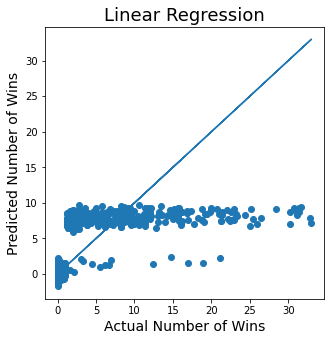

In [150]:
plt.figure(figsize=(5,5))
plt.scatter(x=target_test, y=pred_test)
plt.plot(target_test, target_test)
plt.xlabel('Actual Number of Wins', fontsize=14)
plt.ylabel('Predicted Number of Wins', fontsize=14)
plt.title('Linear Regression', fontsize=18)
plt.show()

# Regularization

In [151]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso
parameters={'alpha':[.0001, .001, .01,.1, 1, 10], 'random_state':list(range(0,10))}
ls=Lasso()
clf=GridSearchCV(ls,parameters)
clf.fit(features_train,target_train)
print(clf.best_params_)

{'alpha': 0.001, 'random_state': 0}


In [162]:
ls=Lasso(alpha=0.001, random_state=0)
ls.fit(features_train,target_train)
ls.score(features_train, target_train)
pred_ls=ls.predict(features_test)

lss=r2_score(target_test,pred_ls)
lss

0.4863990294073792

In [163]:
cv_score=cross_val_score(ls,X_scaled_r,y_r,cv=4)
cv_mean=cv_score.mean()
cv_mean

0.47428894211932937

# Using Random Forest Regressor Model

In [154]:
from sklearn.ensemble import RandomForestRegressor
parameters={'criterion':['mse','mae'], 'max_features':["auto", "sqrt", "log2"]}
rf=RandomForestRegressor()
clf=GridSearchCV(rf,parameters)
clf.fit(features_train,target_train)

print(clf.best_params_)

{'criterion': 'mse', 'max_features': 'log2'}


In [160]:
rf=RandomForestRegressor(criterion="mse", max_features="log2")
rf.fit(features_train, target_train)
rf.score(features_train, target_train)
pred_decision=rf.predict(features_test)

rfs=r2_score(target_test,pred_decision)
print('R2 Score: ', rfs*100)

rfscore=cross_val_score(rf,X_scaled_r,y_r,cv=4)
rfc=rfscore.mean()
print("Cross Val Score:", rfc*100)

R2 Score:  70.33594428118116
Cross Val Score: 52.38704195208905


# Using Ada Boost Regressor Model

In [156]:
from sklearn.ensemble import AdaBoostRegressor
parameters={'n_estimators':np.arange(10,100), 'learning_rate':np.arange(0.01,0.1)}
ad=AdaBoostRegressor()
clf=GridSearchCV(ad,parameters)
clf.fit(features_train,target_train)

print(clf.best_params_)

{'learning_rate': 0.01, 'n_estimators': 16}


In [161]:
ad=AdaBoostRegressor(n_estimators=16, learning_rate=0.01)
ad.fit(features_train, target_train)
ad.score(features_train, target_train)
pred_decision=ad.predict(features_test)

ads=r2_score(target_test,pred_decision)
print('R2 Score: ', ads*100)

adscore=cross_val_score(ad,X_scaled_r,y_r,cv=4)
adc=adscore.mean()
print("Cross Val Score:", adc*100)

R2 Score:  50.07484017409401
Cross Val Score: 47.811828875707484


# 
The model accuracy of Random Forest CLassifier is 70.3% and cross validation is 52.38%, Random Forest Regressor is preferred

# Saving the Random Forest Regressor Model for Prediction 2- Rainfall

In [164]:
filename='Rainfall Prediction Prediction 2- Rainfall.pkl'
pickle.dump(rf, open(filename,'wb'))